<a href="https://colab.research.google.com/github/varshaelza/Text-Summarization-Categorization/blob/main/BBC_Summarise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [ ]:
data_folder = "/content/drive/MyDrive/BBC Dataset/BBC News Summary/News Articles"
dataf = ["business","entertainment","politics","sport","tech"]
summ_folder = "/content/drive/MyDrive/BBC Dataset/BBC News Summary/Summaries"
summf = ["business","entertainment","politics","sport","tech"]

In [ ]:
dataflist = [f for f in os.listdir(data_folder) if not f.startswith('.')]
summflist = [f for f in os.listdir(summ_folder) if not f.startswith('.')]

In [ ]:
summflist

['sport', 'politics', 'entertainment', 'tech', 'business']

In [ ]:
news = []
newstype = []
summary= []

In [ ]:
dataf

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
for folder in dataf:
    datapath = '/content/drive/MyDrive/BBC Dataset/BBC News Summary/News Articles/'+folder
    summpath = '/content/drive/MyDrive/BBC Dataset/BBC News Summary/Summaries/'+folder
    file1 = os.listdir(datapath)
    file2 = os.listdir(summpath)
    for text_file in file1:
        file_path = datapath + "/" +text_file
        file_path2 = summpath + "/" +text_file
        with open(file_path, errors='replace') as f:
            data = f.readlines()
        with open(file_path2, errors='replace') as f:
            data2 = f.readlines()
        data = ' '.join(data)
        news.append(data)
        newstype.append(folder)
        summary.append(data2)
    
        

In [ ]:
newsdict = {'News':news,'Summary':summary ,'Type':newstype}
df = pd.DataFrame(newsdict)
df.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummary.csv')

In [ ]:
df.head()

,News,Summary,Type
0,UK Coal plunges into deeper loss\n \n Shares i...,"[UK Coal said it was making ""significant progr...",business
1,Umbro profits lifted by Euro 2004\n \n UK spor...,[UK sportswear firm Umbro has posted a 222% ri...,business
2,Ad sales boost Time Warner profit\n \n Quarter...,[TimeWarner said fourth quarter sales rose 2% ...,business
3,Telegraph newspapers axe 90 jobs\n \n The Dail...,"[""Journalists are the lifeblood of any newspap...",business
4,S Korean consumers spending again\n \n South K...,[The country's economy has suffered from an ov...,business


In [ ]:
y = df['Type']
X = df.drop('Type', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train['Type']=y_train
X_test['Type']=y_test

X_train.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')
X_test.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')


**Preprocessing**

In [ ]:
import pandas as pd
traindata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

In [ ]:
traindata.drop(traindata.columns[traindata.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
traindata

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'..."
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'..."
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ..."
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',..."
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year seen on...

In [ ]:
traindata["News_lower"] = traindata["News"].str.lower()
traindata.head()

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'..."
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'..."
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ..."
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',..."
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year seen on...

In [ ]:
traindata['news_wo_nltab'] = traindata['News_lower'].replace('\n','.', regex=True)
traindata['news_wo_nltab'] = traindata['news_wo_nltab'].replace('\t',' ', regex=True)
traindata['news_wo_nltab'] = traindata['news_wo_nltab'].replace(r'\.+', ".", regex=True)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
traindata["news_wo_stop"] = traindata["news_wo_nltab"].apply(lambda text: remove_stopwords(text))
#traindata.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
traindata['news_wo_no'] = traindata['news_wo_stop'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')

In [ ]:
#stemming
from nltk.stem import PorterStemmer

# Drop the two columns 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(porter)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
#stemming
from nltk.stem import LancasterStemmer

# Drop the two columns 

stemmer = LancasterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(lancast)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
#stemming
from nltk.stem.snowball import SnowballStemmer

# Drop the two columns 

stemmer = SnowballStemmer(language='english')
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(snow)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
#stemming
from nltk.stem import RegexpStemmer

# Drop the two columns 

stemmer = RegexpStemmer('ing$|s$|e$|able$', min=4)
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(reg)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

traindata["news_lemmatize(wordnet)"] = traindata["news_wo_no"].apply(lambda text: lemmatize_words(text))
#traindata.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import string
PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)
traindata["news_wo_punct"] = traindata["news_lemmatize(wordnet)"].apply(lambda text: remove_punctuation(text))
#traindata.head()

In [ ]:
traindata['news_wo_punct'] = traindata['news_wo_punct'].replace(r'\.+', ".", regex=True)

In [ ]:
STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
traindata["news_wo_punct&single"] = traindata["news_wo_punct"].apply(lambda text: remove_stopwords(text))


In [ ]:
def spl(text):
  return text.split('.',1)[1]
traindata["news_wo_punct&single"]=traindata["news_wo_punct&single"].apply(lambda text: spl(text))
traindata.head()

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year seen on...,federer join all-tim greats. . last year seen ...,federer join all-time greats. . last year seen...,federer join all time greats. . last year seen...,. last year seen one player dominate men tenn...


In [ ]:
import nltk
nltk.download('punkt')
tk=nltk.RegexpTokenizer('[.]', gaps = True)
traindata['news_tokenized(reg)'] = traindata.apply(lambda row: tk.tokenize(row['news_wo_punct&single']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk import sent_tokenize
#nltk.download('punkt')
def tk(text):
  return sent_tokenize(text)
traindata['news_tokenized(sent)'] = traindata["news_wo_punct&single"].apply(lambda text: tk(text))

In [ ]:
from nltk import word_tokenize
#nltk.download('punkt')
def tk(text):
  return word_tokenize(text)
traindata['news_tokenized(words)'] = traindata["news_wo_punct&single"].apply(lambda text: tk(text))

In [ ]:
def tk(text):
  while('.' in text):
    text.remove('.')
  return text
traindata['news_tokenized(reg)'] = traindata["news_tokenized(reg)"].apply(lambda text: tk(text))
def tk(text):
  while(' ' in text):
    text.remove(' ')
  return text
traindata['news_tokenized(reg)'] = traindata["news_tokenized(reg)"].apply(lambda text: tk(text))
def tk(text):
  while('.' in text):
    text.remove('.')
  return text
traindata['news_tokenized(sent)'] = traindata["news_tokenized(sent)"].apply(lambda text: tk(text))
def tk(text):
  while(' ' in text):
    text.remove(' ')
  return text
traindata['news_tokenized(sent)'] = traindata["news_tokenized(sent)"].apply(lambda text: tk(text))
def tk(text):
  while(' ' in text):
    text.remove(' ')
  return text
traindata['news_tokenized(words)'] = traindata["news_tokenized(words)"].apply(lambda text: tk(text))
def tk(text):
  while('.' in text):
    text.remove('.')
  return text
traindata['news_tokenized(words)'] = traindata["news_tokenized(words)"].apply(lambda text: tk(text))

In [ ]:
traindata['news_tokenized(sent)'][0]

[' .',
 'bubbling time online game broke onto political arena .',
 'presidential election provided showcase many aimed talking directly generation grown joystick gamepads.',
 'expert say reflects video game becoming mainstream part culture society.',
 'first official political campaign game technically launched last week iowa game commissioned democrat hopeful howard dean.',
 'followed suit including frontrunner elections president forever political machine allowed player run entire presidential campaign including cope media.',
 'others helped raise stake bush kerry contest highlighting candidate virtue vices.',
 'phenomenon astonished forefather political games handful multi discipline game enthusiast keen push frontiers.',
 'when started researching political game university five year ago thought going something would take decade happen said gonzalo frasca computer game specialist information technology university copenhagen.',
 'must admit first person surprised seeing fast evolved 

In [ ]:
df = pd.DataFrame(traindata)
df.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')


Seperating Categories

In [ ]:
import pandas as pd
traindata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.05)

In [ ]:
traindata

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words),final
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'...",
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'...",
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ...",
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',...",
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year 

In [ ]:

buss=pd.DataFrame()
j=0
buss['news']=""
while j<1780:
  if traindata['Category_id'][j]==0:
    buss.loc[len(buss.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
df = pd.DataFrame(buss)
df = pd.DataFrame(buss)
df.to_csv('/content/drive/MyDrive/BBC Dataset/businesslda.csv')


In [ ]:
buss

,news
0,. mark spencer cut price london region averag...
1,. latin america economy grew best performance...
2,. chancellor gordon brown given £bn boost att...
3,. delta air line cutting domestic fare much p...
4,. retail giant federated department store buy...
...,...
409,. stock market watchdog chairman said willing...
410,. dollar hovered close record low euro friday...
411,. brewing giant inbev agreed buy alfa eco sta...
412,. uk based bank standard chartered said would...


In [ ]:
ent=pd.DataFrame()
j=0
ent['news']=""
while j<1780:
  if traindata['Category_id'][j]==1:
    ent.loc[len(ent.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
ent.to_csv('/content/drive/MyDrive/BBC Dataset/entertainmentlda.csv')

In [ ]:
ent

,news
0,. actor colin farrell make debut television m...
1,. dame muriel spark among three british autho...
2,. model caprice holby city actor jeremy edwar...
3,. pop star christina aguilera marry music exe...
4,. british producer wife swap taking legal act...
...,...
294,. movie monster godzilla received star hollyw...
295,. british film director sir alan parker made ...
296,. oscar nominated film biopic ray surpassed b...
297,. creator buffy vampire slayer take new femal...


In [ ]:
pol=pd.DataFrame()
j=0
pol['news']=""
while j<1780:
  if traindata['Category_id'][j]==2:
    pol.loc[len(pol.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
pol.to_csv('/content/drive/MyDrive/BBC Dataset/politicslda.csv')

In [ ]:
pol

,news
0,. former conservative leader william hague sa...
1,. tony blair likely name may election day par...
2,. new home secretary charles clarke vowed plo...
3,. divorced parent seeking access child often ...
4,. prime minister donned life jacket joined sc...
...,...
329,. thousand civil service job already cut move...
330,. veteran labour mp former cabinet minister j...
331,. tony blair told labour supporter he back st...
332,. parent refuse allow former partner contact ...


In [ ]:
spo=pd.DataFrame()
j=0
spo['news']=""
while j<1780:
  if traindata['Category_id'][j]==3:
    spo.loc[len(spo.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1.
spo.to_csv('/content/drive/MyDrive/BBC Dataset/sportlda.csv')

In [ ]:
spo

,news
0,. zambia technical director kalusha bwalya co...
1,. last year seen one player dominate men tenn...
2,. dundee united eased semi final scottish cup...
3,. world number one lindsay davenport criticis...
4,. greg rusedski forced withdraw open marseill...
...,...
408,. stefan koubek say banned three month intern...
409,. dundee united manager ian mccall reprieve s...
410,. iaaf athletics world governing body met ant...
411,. euan murray named scotland training squad e...


In [ ]:
tech=pd.DataFrame()
j=0
tech['news']=""
while j<1780:
  if traindata['Category_id'][j]==4:
    tech.loc[len(tech.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
tech.to_csv('/content/drive/MyDrive/BBC Dataset/techlda.csv')

In [ ]:
tech

,news
0,. bubbling time online game broke onto politi...
1,. chinese net using population look set excee...
2,. movie industry struck file sharing network ...
3,. fast web access encouraging people express ...
4,. bbc online search engine used record amount...
...,...
315,. thousand technology lover industry expert g...
316,. fixed line phone home could soon endangered...
317,. know art know like new search technology co...
318,. ask jeeves bought bloglines website improve...


Rough Work

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.05)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(buss['news']);

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix);

In [ ]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['rise', 'spending', 'year', 'dollar', 'figure', 'price', 'economic', 'rate', 'growth', 'economy']


Topic #1:
['new', 'sale', 'bank', 'would', 'year', 'share', 'firm', 'company', 'mr', 'bn']


Topic #2:
['driven', 'supply', 'highest', 'average', 'recovery', 'slow', 'nation', 'export', 'region', 'decade']




Vectorization+LDA

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/businesslda.csv')

In [ ]:
train

,Unnamed: 0,news
0,0,. mark spencer cut price london region averag...
1,1,. latin america economy grew best performance...
2,2,. chancellor gordon brown given £bn boost att...
3,3,. delta air line cutting domestic fare much p...
4,4,. retail giant federated department store buy...
...,...,...
409,409,. stock market watchdog chairman said willing...
410,410,. dollar hovered close record low euro friday...
411,411,. brewing giant inbev agreed buy alfa eco sta...
412,412,. uk based bank standard chartered said would...


In [ ]:

train.drop(train.columns[train.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
train

,news
0,. mark spencer cut price london region averag...
1,. latin america economy grew best performance...
2,. chancellor gordon brown given £bn boost att...
3,. delta air line cutting domestic fare much p...
4,. retail giant federated department store buy...
...,...
409,. stock market watchdog chairman said willing...
410,. dollar hovered close record low euro friday...
411,. brewing giant inbev agreed buy alfa eco sta...
412,. uk based bank standard chartered said would...


In [ ]:
data = train.news.values.tolist()

In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['mark', 'spencer', 'cut', 'price', 'london', 'region', 'average', 'according', 'research', 'city', 'investment', 'bank', 'dresdner', 'kleinwort', 'wasserstein', 'said', 'in', 'spite', 'snow', 'uk', 'still', 'feel', 'early', 'cutting', 'price', 'spring', 'merchandise', 'stuart', 'rose', 'head', 'said', 'last', 'year', 'price', 'high', 'we', 'bringing', 'range', 'new', 'price', 'point', 'compete', 'mid', 'market', 'retailer', 'like', 'next', 'said', 'next', 'one', 'biggest', 'competitor', 'move', 'may', 'force', 'lower', 'prices', 'drkw', 'said', 'cut', 'either', 'clear', 'stock', 'could', 'indicate', 'longer', 'term', 'step', 'change', 'pricing', 'certain', 'areas', 'either', 'way', 'cannot', 'good', 'news', 'margin', 'added', 'we', 'brought', 'quite', 'lot', 'new', 'clothing', 'new', 'price', 'point', 'part', 'stuart', 'rose', 'strategy', 'quality', 'style', 'and', 'price', 'said', 'spokesman', 'many', 'analyst', 'believe', 'february', 'proving', 'difficult', 'month', 'retailer', 'br

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:1])
import joblib

joblib.dump(data_lemmatized, '/content/drive/MyDrive/BBC Dataset/buss_lemm.jl')

['cut price region accord research say spite snow feel cut price spring merchandise stuart rise head say year price bring range price point compete market retailer say competitor move may force price say cut stock could indicate term step change price area way can news margin add bring lot clothing price point part rise strategy quality style price say spokesman analyst believe prove month retailer consortium figure week expect reflect trading environment produce reseach show basket street average compare year week receive statement owner confirm rebidde company follow financier issue press release say group spike share price follow spokesman say evidence line finance bid say takeover panel touch begin week find know development']


['/content/drive/MyDrive/BBC Dataset/buss_lemm.jl']

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
      token_pattern='[a-zA-Z0-9]{3,}',  
   )
data_vec= vectorizer.fit_transform(data_lemmatized)


['/content/drive/MyDrive/BBC Dataset/buss_cv.jl']

In [ ]:
lda_model =LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1,  perp_tol=0.1,
 random_state=100, topic_word_prior=None, verbose=0)
lda_output = lda_model.fit_transform(data_vec)
print(lda_model) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
print("Log Likelihood: ", lda_model.score(data_vec))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vec))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -206612.72601753456
Perplexity:  399.2026163403905
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vec)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
              perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
        iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vec))


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -47142.4746812507
Model Perplexity:  417.05207857890935


In [ ]:
import joblib

joblib.dump(best_lda_model, '/content/drive/MyDrive/BBC Dataset/buss_cv_lda.jl')
# then reload it with
lda_model = joblib.load('/content/drive/MyDrive/BBC Dataset/buss_cv_lda.jl')


In [ ]:
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vec)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics
df_document_topic.to_csv('/content/drive/MyDrive/BBC Dataset/buss_cv_doctopic.csv')

In [ ]:
lda_output

array([[1.04177077e-03, 1.04170941e-03, 1.04193563e-03, ...,
        1.04177719e-03, 4.22143117e-01, 5.69522663e-01],
       [1.69508800e-03, 1.69492033e-03, 1.69518592e-03, ...,
        1.69495769e-03, 1.69521427e-03, 9.84744788e-01],
       [1.09900528e-03, 1.09891098e-03, 1.09926677e-03, ...,
        1.09892714e-03, 1.09948385e-03, 9.90108304e-01],
       ...,
       [3.57181396e-03, 3.57152325e-03, 3.57195199e-03, ...,
        3.57151128e-03, 9.67853223e-01, 3.57255446e-03],
       [7.87872890e-02, 6.02434681e-04, 6.02547461e-04, ...,
        6.02424278e-04, 5.20238641e-01, 3.96756878e-01],
       [9.52464652e-04, 9.52389455e-04, 9.52595776e-04, ...,
        9.52404887e-04, 1.78351188e-01, 7.49375049e-01]])

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()


In [ ]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords
df_topic_keywords.to_csv('/content/drive/MyDrive/BBC Dataset/buss_cv_topics.csv')

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')
train.drop(train.columns[train.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
train.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

Sentence Scoring

In [ ]:
import joblib

lda_model = joblib.load('/content/drive/MyDrive/BBC Dataset/buss_cv_lda.jl')


In [ ]:
import nltk
nltk.download('punkt')
text=train['news'][22]
a_list = nltk.tokenize.sent_tokenize(text)
s=len(a_list)
df=pd.DataFrame()
j=0
df['news']=""
while j<s:
  df.loc[len(df.index)]=[a_list[j]]
  j=j+1
#df.to_csv('/content/drive/MyDrive/BBC Dataset/sent.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,news
0,.
1,india raised limit foreign direct investment t...
2,.
3,communication minister dayanidhi maran said ne...
4,government hope increase number mobile user mi...
5,decision raise limit foreign investor faced co...
6,potential foreign investor however need govern...
7,key positions chief executive chief technology...
8,.
9,analyst investor welcomed government decision.


In [ ]:
data = df.news.values.tolist()

In [ ]:
d=[' ']
d[0]=data[1]
d

['india raised limit foreign direct investment telecom company .']

In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(d))
print(data_words[:2])

[['india', 'raised', 'limit', 'foreign', 'direct', 'investment', 'telecom', 'company']]


In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:1])

['raise limit investment company']


In [ ]:
data_lemmatized

['raise limit investment company']

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
      token_pattern='[a-zA-Z0-9]{3,}',  
   )
d=joblib.load('/content/drive/MyDrive/BBC Dataset/buss_lemm.jl')
vectorizer.fit_transform(d)
data_vec=vectorizer.transform(data_lemmatized)


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
topic_probability_scores = lda_model.transform(data_vec)
df_topic_keywords=pd.read_csv('/content/drive/MyDrive/BBC Dataset/buss_cv_topics.csv')
topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores),1:14].values.tolist()
    
    # Step 5: Infer Topic
infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]

# Predict the topic

print(topic)
print(infer_topic)
topic_probability_scores


['say', 'year', 'rise', 'growth', 'economy', 'rate', 'price', 'month', 'country', 'market', 'fall', 'government', 'expect']
Topic 9


array([[0.02000267, 0.02000021, 0.2551135 , 0.02000512, 0.02000207,
        0.02000004, 0.02000015, 0.0200001 , 0.02000721, 0.58486893]])

In [ ]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,card,debt,creditor,credit,say,parent,bankruptcy,group,payment,firm,crisis,would,avoid,offer,pay
Topic 1,store,sale,chain,combine,deal,competition,retailer,may,speed,expect,struggle,bring,quarter,say,create
Topic 2,say,company,firm,fraud,government,would,case,court,oil,claim,pay,tax,state,charge,year
Topic 3,director,land,say,company,year,property,shareholder,settlement,employ,government,tell,insurance,firm,fail,ask
Topic 4,pension,ebber,phone,member,trial,fraud,share,year,profit,appear,would,emerge,scheme,sentence,worker
Topic 5,deficit,import,car,dollar,slide,expand,export,year,trade,difference,impact,indicate,accept,fall,maker
Topic 6,company,contract,year,rise,quarter,group,oil,report,say,economy,hope,rate,consider,accuse,meet
Topic 7,food,charge,chain,retailer,confidence,say,year,executive,team,work,sign,help,earning,share,amount
Topic 8,say,firm,would,share,make,market,company,year,deal,offer,could,take,cost,may,business
Topic 9,say,year,rise,growth,economy,rate,price,month,country,market,fall,government,expect,report,dollar


Gensim LDA

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/sportlda.csv')

In [ ]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [ ]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

In [ ]:
train

,Unnamed: 0,news
0,0,. zambia technical director kalusha bwalya co...
1,1,. last year seen one player dominate men tenn...
2,2,. dundee united eased semi final scottish cup...
3,3,. world number one lindsay davenport criticis...
4,4,. greg rusedski forced withdraw open marseill...
...,...,...
408,408,. stefan koubek say banned three month intern...
409,409,. dundee united manager ian mccall reprieve s...
410,410,. iaaf athletics world governing body met ant...
411,411,. euan murray named scotland training squad e...


In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
processed_docs = train['news'].map(preprocess)
processed_docs = processed_docs.values.tolist()
processed_docs=lemmatization(processed_docs)

In [ ]:
processed_docs


[['confident',
  'say',
  'short',
  'victory',
  'however',
  'warn',
  'side',
  'complacent',
  'want',
  'team',
  'comfortable',
  'sure',
  'victory',
  'go',
  'difficult',
  'game',
  'main',
  'aim',
  'game',
  'enjoy',
  'show',
  'determination',
  'win',
  'final',
  'recall',
  'foreign',
  'base',
  'player',
  'however',
  'year',
  'old',
  'become',
  'old',
  'player',
  'appear',
  'competition',
  'play',
  'score',
  'mauritius',
  'uncertain',
  'take',
  'field',
  'fan',
  'however',
  'cautious',
  'victory',
  'concert',
  'already',
  'schedule',
  'match',
  'feature',
  'country',
  'top',
  'musician',
  'side',
  'hope',
  'win',
  'competition',
  'record',
  'third',
  'time',
  'keep',
  'first',
  'edition',
  'regional',
  'tournament',
  'southern',
  'african',
  'nation',
  'prevent',
  'third',
  'straight',
  'knock',
  'final',
  'stage',
  'victory',
  'also',
  'mark',
  'first',
  'defeat',
  'year',
  'play',
  'name',
  'overseas',
  'bas

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 african
1 aim
2 already
3 also
4 appear
5 base
6 become
7 cautious
8 comfortable
9 competition
10 complacent


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
import joblib
joblib.dump(dictionary, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_dict.jl')
# then reload it with
dictionary=joblib.load( '/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_dict.jl')

In [ ]:
dictionary

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

[(1, 1),
 (2, 2),
 (6, 2),
 (16, 1),
 (38, 1),
 (50, 1),
 (62, 1),
 (86, 1),
 (102, 2),
 (122, 1),
 (134, 1),
 (165, 1),
 (182, 1),
 (186, 1),
 (210, 1),
 (238, 1),
 (244, 1),
 (250, 2),
 (255, 1),
 (256, 1),
 (259, 3),
 (261, 3),
 (263, 1),
 (275, 1),
 (278, 1),
 (279, 1),
 (281, 1),
 (282, 4),
 (293, 1),
 (294, 2),
 (295, 1),
 (296, 1),
 (297, 4),
 (298, 1),
 (299, 1),
 (300, 2),
 (301, 1),
 (302, 1),
 (303, 1),
 (304, 1),
 (305, 1),
 (306, 1),
 (307, 2),
 (308, 1),
 (309, 2)]

In [ ]:
bow_doc_10 = bow_corpus[10]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], 
bow_doc_10[i][1]))

Word 1 ("already") appears 1 time.
Word 2 ("also") appears 2 time.
Word 6 ("competition") appears 2 time.
Word 16 ("game") appears 1 time.
Word 38 ("sure") appears 1 time.
Word 50 ("back") appears 1 time.
Word 62 ("dope") appears 1 time.
Word 86 ("last") appears 1 time.
Word 102 ("pair") appears 2 time.
Word 122 ("set") appears 1 time.
Word 134 ("way") appears 1 time.
Word 165 ("receive") appears 1 time.
Word 182 ("hear") appears 1 time.
Word 186 ("issue") appears 1 time.
Word 210 ("determine") appears 1 time.
Word 238 ("could") appears 1 time.
Word 244 ("re") appears 1 time.
Word 250 ("ban") appears 2 time.
Word 255 ("coach") appears 1 time.
Word 256 ("decide") appears 1 time.
Word 259 ("drug") appears 3 time.
Word 261 ("face") appears 3 time.
Word 263 ("former") appears 1 time.
Word 275 ("rule") appears 1 time.
Word 278 ("spokesman") appears 1 time.
Word 279 ("substance") appears 1 time.
Word 281 ("suspension") appears 1 time.
Word 282 ("test") appears 4 time.
Word 293 ("would") appe

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.15664729658136145),
 (1, 0.1047395990505884),
 (2, 0.038717290099265916),
 (3, 0.1364512411923625),
 (4, 0.4699418897440843),
 (5, 0.11272818891988033),
 (6, 0.2359668494310971),
 (7, 0.11939393013001975),
 (8, 0.12084784245839039),
 (9, 0.09274886979375642),
 (10, 0.11030466167747732),
 (11, 0.1344403665507221),
 (12, 0.11798342471554855),
 (13, 0.12084784245839039),
 (14, 0.10995985395212883),
 (15, 0.0764018175154106),
 (16, 0.06618914456447518),
 (17, 0.08319349688934886),
 (18, 0.30507076721750914),
 (19, 0.08523331390399616),
 (20, 0.14803289064305386),
 (21, 0.0961251931122808),
 (22, 0.14074951420063575),
 (23, 0.05111358770428614),
 (24, 0.11398822152418969),
 (25, 0.07469013312308309),
 (26, 0.1042741185104821),
 (27, 0.15591045057844766),
 (28, 0.15359795326994277),
 (29, 0.09357060220065967),
 (30, 0.15359795326994277),
 (31, 0.08319349688934886),
 (32, 0.12549898060530879),
 (33, 0.12887530392383317),
 (34, 0.08809773164683801),
 (35, 0.0989111564025819),
 (36, 0.10

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.015*"come" + 0.014*"player" + 0.013*"get" + 0.013*"good" + 0.012*"take" + 0.011*"game" + 0.011*"try" + 0.011*"also" + 0.010*"second" + 0.009*"would"
Topic: 1 
Words: 0.017*"take" + 0.017*"last" + 0.015*"final" + 0.015*"set" + 0.014*"win" + 0.013*"second" + 0.013*"first" + 0.012*"test" + 0.011*"world" + 0.010*"good"
Topic: 2 
Words: 0.026*"win" + 0.016*"take" + 0.016*"think" + 0.015*"give" + 0.015*"get" + 0.013*"would" + 0.013*"first" + 0.013*"goal" + 0.011*"open" + 0.011*"way"
Topic: 3 
Words: 0.019*"would" + 0.017*"take" + 0.015*"player" + 0.012*"back" + 0.010*"first" + 0.009*"good" + 0.009*"minute" + 0.009*"race" + 0.008*"month" + 0.008*"win"
Topic: 4 
Words: 0.014*"take" + 0.014*"last" + 0.013*"win" + 0.011*"first" + 0.011*"player" + 0.011*"minute" + 0.010*"good" + 0.009*"season" + 0.009*"second" + 0.008*"want"
Topic: 5 
Words: 0.023*"game" + 0.019*"win" + 0.016*"side" + 0.016*"player" + 0.015*"get" + 0.013*"good" + 0.013*"team" + 0.012*"look" + 0.012*"back" + 0.0

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.008*"compete" + 0.007*"injury" + 0.006*"open" + 0.006*"also" + 0.006*"first" + 0.005*"nation" + 0.005*"training" + 0.005*"australian" + 0.005*"chance" + 0.005*"half"
Topic: 1 Word: 0.008*"nation" + 0.007*"international" + 0.007*"open" + 0.007*"jump" + 0.007*"player" + 0.007*"round" + 0.006*"european" + 0.006*"woman" + 0.006*"man" + 0.006*"next"
Topic: 2 Word: 0.008*"draw" + 0.007*"race" + 0.007*"final" + 0.007*"game" + 0.007*"side" + 0.007*"host" + 0.006*"australian" + 0.006*"round" + 0.006*"irish" + 0.006*"last"
Topic: 3 Word: 0.018*"drug" + 0.014*"ban" + 0.013*"dope" + 0.012*"test" + 0.009*"charge" + 0.009*"would" + 0.009*"decision" + 0.007*"take" + 0.007*"medal" + 0.007*"club"
Topic: 4 Word: 0.011*"minute" + 0.008*"arsenal" + 0.008*"goal" + 0.007*"race" + 0.007*"head" + 0.007*"run" + 0.006*"real" + 0.006*"later" + 0.006*"home" + 0.006*"score"
Topic: 5 Word: 0.011*"arsenal" + 0.007*"number" + 0.006*"season" + 0.006*"club" + 0.006*"contract" + 0.006*"soon" + 0.006*"su

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/sportlda.csv')

In [ ]:
import joblib

joblib.dump(lda_model_tfidf, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_tfidf_genlda.jl')
# then reload it with
lda_model_tfidf = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_tfidf_genlda.jl')

In [ ]:
import joblib

joblib.dump(lda_model, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_bow_genlda.jl')
# then reload it with
lda_model = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_bow_genlda.jl')

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[6]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7425795793533325	 
Topic: 0.008*"fan" + 0.008*"club" + 0.008*"action" + 0.008*"want" + 0.006*"follow" + 0.006*"situation" + 0.006*"sign" + 0.006*"month" + 0.006*"think" + 0.006*"player"

Score: 0.23519380390644073	 
Topic: 0.008*"bid" + 0.007*"match" + 0.006*"lion" + 0.006*"set" + 0.006*"manager" + 0.006*"club" + 0.006*"know" + 0.006*"player" + 0.006*"would" + 0.005*"good"


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -BOW
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2835626643014535


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -TFIDF
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.30577119714027134


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=50, step=1)

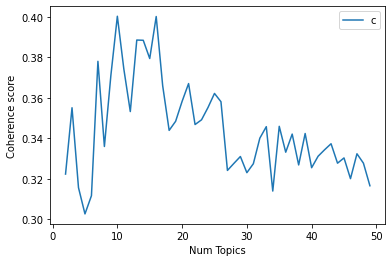

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3224
Num Topics = 3  has Coherence Value of 0.3551
Num Topics = 4  has Coherence Value of 0.3157
Num Topics = 5  has Coherence Value of 0.3027
Num Topics = 6  has Coherence Value of 0.3117
Num Topics = 7  has Coherence Value of 0.378
Num Topics = 8  has Coherence Value of 0.336
Num Topics = 9  has Coherence Value of 0.3711
Num Topics = 10  has Coherence Value of 0.4003
Num Topics = 11  has Coherence Value of 0.3743
Num Topics = 12  has Coherence Value of 0.3533
Num Topics = 13  has Coherence Value of 0.3885
Num Topics = 14  has Coherence Value of 0.3884
Num Topics = 15  has Coherence Value of 0.3794
Num Topics = 16  has Coherence Value of 0.4001
Num Topics = 17  has Coherence Value of 0.366
Num Topics = 18  has Coherence Value of 0.344
Num Topics = 19  has Coherence Value of 0.3485
Num Topics = 20  has Coherence Value of 0.3583
Num Topics = 21  has Coherence Value of 0.3671
Num Topics = 22  has Coherence Value of 0.3469
Num Topics = 23  has Cohe

In [ ]:
optimal_model = model_list[8]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.040*"game" + 0.026*"referee" + 0.024*"want" + 0.022*"manager" + '
  '0.019*"tell" + 0.017*"get" + 0.016*"comment" + 0.016*"come" + '
  '0.015*"result" + 0.015*"add"'),
 (1,
  '0.045*"would" + 0.030*"test" + 0.029*"ban" + 0.028*"athlete" + 0.028*"drug" '
  '+ 0.026*"dope" + 0.026*"also" + 0.024*"money" + 0.021*"take" + 0.021*"set"'),
 (2,
  '0.067*"match" + 0.051*"charge" + 0.050*"see" + 0.044*"know" + 0.033*"push" '
  '+ 0.033*"arsenal" + 0.024*"hear" + 0.022*"face" + 0.022*"name" + '
  '0.021*"meet"'),
 (3,
  '0.026*"good" + 0.022*"player" + 0.021*"game" + 0.018*"win" + 0.016*"think" '
  '+ 0.015*"come" + 0.015*"get" + 0.014*"look" + 0.013*"could" + 0.013*"back"'),
 (4,
  '0.034*"club" + 0.023*"new" + 0.022*"big" + 0.020*"move" + 0.020*"give" + '
  '0.020*"head" + 0.018*"want" + 0.018*"player" + 0.016*"also" + 0.015*"many"'),
 (5,
  '0.065*"goal" + 0.026*"bad" + 0.025*"day" + 0.025*"national" + '
  '0.024*"player" + 0.023*"score" + 0.023*"win" + 0.022*"try" + 0.021*"rugby" '

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -BOW
coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40029087623473336


In [ ]:
import joblib

joblib.dump(optimal_model, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_optbow_genlda.jl')
# then reload it with
optimal_model = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_optbow_genlda.jl')

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=processed_docs, start=2, limit=50, step=1)

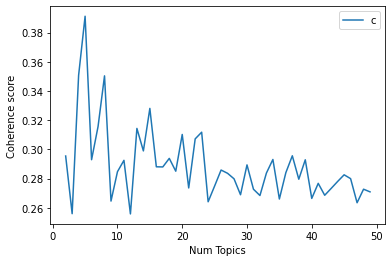

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2955
Num Topics = 3  has Coherence Value of 0.256
Num Topics = 4  has Coherence Value of 0.3508
Num Topics = 5  has Coherence Value of 0.3912
Num Topics = 6  has Coherence Value of 0.293
Num Topics = 7  has Coherence Value of 0.3157
Num Topics = 8  has Coherence Value of 0.3504
Num Topics = 9  has Coherence Value of 0.2646
Num Topics = 10  has Coherence Value of 0.2848
Num Topics = 11  has Coherence Value of 0.2925
Num Topics = 12  has Coherence Value of 0.2559
Num Topics = 13  has Coherence Value of 0.3144
Num Topics = 14  has Coherence Value of 0.299
Num Topics = 15  has Coherence Value of 0.3281
Num Topics = 16  has Coherence Value of 0.2881
Num Topics = 17  has Coherence Value of 0.288
Num Topics = 18  has Coherence Value of 0.2939
Num Topics = 19  has Coherence Value of 0.2851
Num Topics = 20  has Coherence Value of 0.3103
Num Topics = 21  has Coherence Value of 0.2736
Num Topics = 22  has Coherence Value of 0.3072
Num Topics = 23  has Cohe

In [ ]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.039*"referee" + 0.022*"penalty" + 0.016*"half" + 0.015*"line" + '
  '0.014*"comment" + 0.013*"minute" + 0.011*"touch" + 0.011*"ball" + '
  '0.011*"corner" + 0.010*"official"'),
 (1,
  '0.037*"ban" + 0.032*"dope" + 0.032*"drug" + 0.027*"athlete" + '
  '0.027*"substance" + 0.023*"test" + 0.019*"statement" + 0.016*"task" + '
  '0.016*"spokesman" + 0.015*"issue"'),
 (2,
  '0.002*"official" + 0.002*"foot" + 0.002*"ban" + 0.002*"sale" + '
  '0.002*"referee" + 0.002*"statement" + 0.002*"avoid" + 0.002*"money" + '
  '0.002*"save" + 0.002*"back"'),
 (3,
  '0.006*"match" + 0.006*"goal" + 0.006*"player" + 0.006*"game" + '
  '0.006*"nation" + 0.006*"would" + 0.005*"good" + 0.005*"win" + 0.005*"want" '
  '+ 0.005*"back"'),
 (4,
  '0.002*"official" + 0.002*"foot" + 0.002*"ban" + 0.002*"sale" + '
  '0.002*"referee" + 0.002*"statement" + 0.002*"avoid" + 0.002*"rather" + '
  '0.002*"money" + 0.002*"save"')]


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -TFIDF
coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48850145359825525


In [ ]:
import joblib

joblib.dump(optimal_model, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_opttfidf_genlda.jl')
# then reload it with
optimal_model = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_opttfidf_genlda.jl')

Scoring

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/businesslda.csv')

In [ ]:
import nltk
nltk.download('punkt')
text=train['news'][0]
a_list = nltk.tokenize.sent_tokenize(text)
s=len(a_list)
df=pd.DataFrame()
j=0
df['news']=""
while j<s:
  if [a_list[j]]==[' .'] :
    j=j+1;
  elif [a_list[j]]==['.'] :
    j=j+1
  else:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1;

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,news
0,mark spencer cut price london region average a...
1,dresdner kleinwort wasserstein said in spite s...
2,stuart rose head said last year price high.
3,we bringing range new price point compete mid ...
4,next one biggest competitor move may force low...
5,drkw said cut either clear stock could indicat...
6,we brought quite lot new clothing new price po...
7,many analyst believe february proving difficul...
8,separately investment bank goldman sachs produ...
9,strange week tuesday received statement philip...


In [ ]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [ ]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
processed_docs = df['news'].map(preprocess)
processed_docs = processed_docs.values.tolist()
processed_docs=lemmatization(processed_docs)

In [ ]:
processed_docs

[['cut', 'price', 'region', 'average', 'accord', 'research'],
 ['say',
  'spite',
  'snow',
  'still',
  'feel',
  'early',
  'cut',
  'price',
  'spring',
  'merchandise'],
 ['say', 'last', 'year', 'price', 'high'],
 ['bring',
  'range',
  'new',
  'price',
  'point',
  'compete',
  'mid',
  'market',
  'retailer',
  'next',
  'say'],
 ['big', 'competitor', 'move', 'may', 'force', 'low', 'price'],
 ['say',
  'cut',
  'clear',
  'stock',
  'could',
  'indicate',
  'long',
  'term',
  'step',
  'change',
  'price',
  'certain',
  'area',
  'way',
  'can',
  'good',
  'news',
  'margin',
  'add'],
 ['bring',
  'quite',
  'lot',
  'new',
  'clothing',
  'new',
  'price',
  'point',
  'part',
  'rise',
  'strategy',
  'quality',
  'style',
  'price',
  'say',
  'spokesman'],
 ['many',
  'analyst',
  'believe',
  'prove',
  'difficult',
  'month',
  'retailer',
  'retail',
  'consortium',
  'figure',
  'due',
  'week',
  'expect',
  'reflect',
  'tough',
  'trading',
  'environment'],
 ['se

In [ ]:
dictionary=joblib.load( '/content/drive/MyDrive/BBC Dataset/buss_dict.jl')


In [ ]:
#dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accord
1 add
2 analyst
3 area
4 average
5 begin
6 believe
7 bid
8 big
9 bring
10 can


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [ ]:
bow_corpus

[[(0, 1), (4, 1), (17, 1), (54, 1), (60, 1), (62, 1)],
 [(17, 1), (21, 1), (24, 1), (54, 1), (71, 1)],
 [(33, 1), (38, 1), (54, 1)],
 [(9, 1), (44, 1), (48, 1), (50, 1), (53, 1), (54, 1), (57, 1), (64, 1)],
 [(8, 1), (29, 1), (42, 1), (45, 1), (47, 1), (54, 1)],
 [(1, 1),
  (3, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (16, 1),
  (17, 1),
  (30, 1),
  (35, 1),
  (40, 1),
  (49, 1),
  (54, 1),
  (70, 1),
  (72, 1),
  (74, 1),
  (77, 1)],
 [(9, 1), (41, 1), (48, 2), (52, 1), (53, 1), (54, 2), (65, 1), (68, 1)],
 [(2, 1),
  (6, 1),
  (19, 1),
  (20, 1),
  (23, 1),
  (25, 1),
  (43, 1),
  (46, 1),
  (56, 1),
  (59, 1),
  (63, 1),
  (64, 1),
  (75, 1),
  (76, 1),
  (78, 1)],
 [(4, 1), (14, 1), (30, 1), (33, 1), (38, 1), (55, 1), (67, 1)],
 [(13, 1), (15, 1), (51, 1), (58, 1), (69, 1), (78, 1)],
 [(28, 2), (31, 1), (36, 1), (54, 1), (61, 1), (66, 1)],
 [(7, 1), (22, 1), (26, 1), (34, 1), (39, 1), (68, 1)],
 [(5, 1), (18, 1), (27, 1), (37, 1), (73, 1), (78, 1)]]

In [ ]:
bow_doc_10 = bow_corpus[0]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], 
bow_doc_10[i][1]))

Word 0 ("accord") appears 1 time.
Word 4 ("average") appears 1 time.
Word 17 ("cut") appears 1 time.
Word 54 ("price") appears 1 time.
Word 60 ("region") appears 1 time.
Word 62 ("research") appears 1 time.


In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    

[(0, 0.5066814256619627),
 (4, 0.3697567723084707),
 (17, 0.2896609846724346),
 (54, 0.09590746560148669),
 (60, 0.5066814256619627),
 (62, 0.5066814256619627)]
[(17, 0.31175554065970107),
 (21, 0.5453297135549838),
 (24, 0.5453297135549838),
 (54, 0.10322302751855054),
 (71, 0.5453297135549838)]
[(33, 0.6955054972221509), (38, 0.6955054972221509), (54, 0.18040012934456867)]
[(9, 0.32107192908083676),
 (44, 0.43996809511036533),
 (48, 0.32107192908083676),
 (50, 0.43996809511036533),
 (53, 0.32107192908083676),
 (54, 0.08327959702177952),
 (57, 0.43996809511036533),
 (64, 0.32107192908083676)]
[(8, 0.4456198336052529),
 (29, 0.4456198336052529),
 (42, 0.4456198336052529),
 (45, 0.4456198336052529),
 (47, 0.4456198336052529),
 (54, 0.08434938937617432)]
[(1, 0.2682671904710922),
 (3, 0.2682671904710922),
 (10, 0.2682671904710922),
 (11, 0.2682671904710922),
 (12, 0.2682671904710922),
 (16, 0.2682671904710922),
 (17, 0.1533637007625513),
 (30, 0.19577116002478198),
 (35, 0.26826719047109

In [ ]:
corpus_tfidf

In [ ]:
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.9006560444831848	 
Topic: 0.010*"oil" + 0.009*"rate" + 0.007*"economy" + 0.006*"price" + 0.006*"high" + 0.006*"fall" + 0.005*"growth" + 0.005*"production" + 0.005*"offer" + 0.005*"rise"

Score: 0.08791369199752808	 
Topic: 0.008*"dollar" + 0.006*"job" + 0.006*"oil" + 0.006*"fall" + 0.005*"company" + 0.005*"price" + 0.005*"sale" + 0.005*"figure" + 0.005*"economy" + 0.004*"share"


In [ ]:
processed_docs[1]

['economy',
 'grow',
 'good',
 'performance',
 'export',
 'register',
 'good',
 'performance',
 'decade',
 'say',
 'region',
 'grow',
 'year',
 'say',
 'regional',
 'export',
 'reach',
 'doubt',
 'strength',
 'recovery',
 'overheat',
 'chinese',
 'economy',
 'however',
 'pose',
 'risk',
 'organisation',
 'also',
 'warn',
 'high',
 'oil',
 'price',
 'raise',
 'risk',
 'inflation',
 'recession',
 'nevertheless',
 'economic',
 'still',
 'forecast',
 'growth',
 'strong',
 'recovery',
 'country',
 'boost',
 'overall',
 'performance',
 'region',
 'also',
 'say',
 'large',
 'latin',
 'american',
 'economy',
 'grow',
 'second',
 'time',
 'year',
 'chinese',
 'economic',
 'strength',
 'help',
 'boost',
 'export',
 'strong',
 'demand',
 'agricultural',
 'mining',
 'product',
 'fact',
 'latin',
 'american',
 'export',
 'grow',
 'high',
 'oil',
 'price',
 'also',
 'help',
 'boost',
 'export',
 'important',
 'oil',
 'exporter',
 'regional',
 'free',
 'trade',
 'agreement',
 'contribute',
 'region',

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(11)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7252,"dollar, job, oil, fall, company, price, sale, ...","[cut, price, region, average, accord, research]"
1,1,7.0,0.7049,"oil, rate, economy, price, high, fall, growth,...","[say, spite, snow, still, feel, early, cut, pr..."
2,2,1.0,0.6499,"dollar, job, oil, fall, company, price, sale, ...","[say, last, year, price, high]"
3,3,3.0,0.5322,"sale, fraud, retailer, firm, consumer, report,...","[bring, range, new, price, point, compete, mid..."
4,4,8.0,0.7282,"mortgage, sale, insurance, profit, firm, marke...","[big, competitor, move, may, force, low, price]"
5,5,1.0,0.4325,"dollar, job, oil, fall, company, price, sale, ...","[say, cut, clear, stock, could, indicate, long..."
6,6,1.0,0.7554,"dollar, job, oil, fall, company, price, sale, ...","[bring, quite, lot, new, clothing, new, price,..."
7,7,1.0,0.5543,"dollar, job, oil, fall, company, price, sale, ...","[many, analyst, believe, prove, difficult, mon..."
8,8,1.0,0.7509,"dollar, job, oil, fall, company, price, sale, ...","[separately, produce, reseach, show, basket, g..."
9,9,3.0,0.7363,"sale, fraud, retailer, firm, consumer, report,...","[strange, week, receive, statement, owner, con..."


In [ ]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7252,"dollar, job, oil, fall, company, price, sale, ...","[cut, price, region, average, accord, research]"
1,1,7.0,0.7049,"oil, rate, economy, price, high, fall, growth,...","[say, spite, snow, still, feel, early, cut, pr..."
2,2,1.0,0.6499,"dollar, job, oil, fall, company, price, sale, ...","[say, last, year, price, high]"
3,3,3.0,0.5322,"sale, fraud, retailer, firm, consumer, report,...","[bring, range, new, price, point, compete, mid..."
4,4,8.0,0.7282,"mortgage, sale, insurance, profit, firm, marke...","[big, competitor, move, may, force, low, price]"
5,5,1.0,0.4325,"dollar, job, oil, fall, company, price, sale, ...","[say, cut, clear, stock, could, indicate, long..."
6,6,1.0,0.7554,"dollar, job, oil, fall, company, price, sale, ...","[bring, quite, lot, new, clothing, new, price,..."
7,7,1.0,0.5543,"dollar, job, oil, fall, company, price, sale, ...","[many, analyst, believe, prove, difficult, mon..."
8,8,1.0,0.7509,"dollar, job, oil, fall, company, price, sale, ...","[separately, produce, reseach, show, basket, g..."
9,9,3.0,0.7363,"sale, fraud, retailer, firm, consumer, report,...","[strange, week, receive, statement, owner, con..."


In [ ]:
train['news'][1]

' . latin america economy grew best performance since export registered best performance two decades. . united nations economic commission latin america caribbean said region grew year. inter american development bank iadb said regional export reached bn £bn bn euros doubt strength recovery overheating chinese economy however pose risk organisation also warned high oil price raise risk either inflation recession. . nevertheless economic commission latin america caribbean eclac still forecast growth strong recovery countries venezuela uruguay boosted overall performance region. eclac also said six largest latin american economy argentina brazil chile colombia mexico venezuela grew second time years. chinese economic strength helped boost exports strong demand agricultural mining products. fact latin american export china grew bn. higher oil price also helped boost exports mexico venezuela important oil exporters. regional bloc well free trade agreement contributed region strong performa

Summary Generation

In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')

In [ ]:
test

,Unnamed: 0,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single
0,0,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics,labour battle plan 'hides blair'\n \n the tori...,labour battle plan 'hides blair'. . the tories...,labour battle plan 'hides blair'. . tories acc...,labour battle plan 'hides blair'. . tories acc...,labour battle plan 'hides blair'. . tory accus...,labour battle plan hides blair . . tory accus...,. tory accused tony blair terrified scrutiny ...
1,1,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics,tutu's guantanamo release call\n \n archbishop...,tutu's guantanamo release call. . archbishop d...,tutu's guantanamo release call. . archbishop d...,tutu's guantanamo release call. . archbishop d...,tutu's guantanamo release call. . archbishop d...,tutu s guantanamo release call. . archbishop d...,. archbishop desmond tutu called release rema...
2,2,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport,holmes starts 2005 with gb events\n \n kelly h...,holmes starts 2005 with gb events. . kelly hol...,holmes starts 2005 gb events. . kelly holmes s...,holmes starts gb events. . kelly holmes start...,holmes start gb events. . kelly holmes start s...,holmes start gb events. . kelly holmes start s...,. kelly holmes start series race britain. . h...
3,3,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics,tory expert denies defeatism\n \n the conserva...,tory expert denies defeatism. . the conservati...,tory expert denies defeatism. . conservatives'...,tory expert denies defeatism. . conservatives'...,tory expert denies defeatism. . conservatives'...,tory expert denies defeatism. . conservatives ...,. conservatives campaign director denied repo...
4,4,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech,movie body targets children's pcs\n \n the bod...,movie body targets children's pcs. . the body ...,movie body targets children's pcs. . body repr...,movie body targets children's pcs. . body repr...,movie body target children's pcs. . body repre...,movie body target children s pcs. . body repre...,. body represents movie industry released lat...
...,...,...,...,...,...,...,...,...,...,...,...,...
440,440,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics,nhs waiting time target is cut\n \n hospital w...,nhs waiting time target is cut. . hospital wai...,nhs waiting time target cut. . hospital waitin...,nhs waiting time target cut. . hospital waitin...,nh waiting time target cut. . hospital waiting...,nh waiting time target cut. . hospital waiting...,. hospital waiting time patient wale cut exte...
441,441,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics,baron kinnock makes lords debut\n \n former la...,baron kinnock makes lords debut. . former labo...,baron kinnock makes lords debut. . former labo...,baron kinnock makes lords debut. . former labo...,baron kinnock make lord debut. . former labour...,baron kinnock make lord debut. . former labour...,. former labour leader neil kinnock officiall...
442,442,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport,player burn-out worries robinson\n \n england ...,player burn-out worries robinson. . england co...,player burn-out worries robinson. . england co...,player burn-out worries robinson. . england co...,player burn-out worry robinson. . england coac...,player burn out worry robinson. . england coac...,. england coach andy robinson say english rug...
443,443,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he mean

In [ ]:
test.drop(test.columns[test.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)


test

,News,Summary,Category_id,Type
0,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics
1,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics
2,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport
3,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics
4,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech
...,...,...,...,...
440,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics
441,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics
442,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport
443,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he meant he would be in his ...,2,politics


In [ ]:
test['Summary1']=""
test['Length1']=0

In [ ]:
def sep(text):
  import nltk
  nltk.download('punkt')
  a_list = nltk.tokenize.sent_tokenize(text)
  s=len(a_list)
  df=pd.DataFrame()
  j=0
  df['News']=""
  while j<s:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

def spl(text):
  t=text.split('\n',1)
  if len(t)!=2:
    return ""
  else :
    return t[1]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))
  """custom function to remove the stopwords"""
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])


def lemmatize_words(text):
  
  from nltk.stem import WordNetLemmatizer
  import nltk
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    import string
    PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)

   
def remove_stop(text):
    """custom function to remove the stopwords"""
    STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])



def pre(df):
  df["News(wh)"]=df['News']
  df["News(wh)"][0]=spl(df["News"][0])
  df["News(wh)"][0]=spl(df["News(wh)"][0])
  df["News1"] = df["News(wh)"].str.lower()
  df['News1'] = df['News1'].replace('\n','.', regex=True)
  df['News1'] = df['News1'].replace('\t',' ', regex=True)
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df["News1"] = df["News1"].apply(lambda text: remove_stopwords(text))
  df['News1'] = df['News1'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')
  df['News1'] = df['News1'].apply(lambda text: lemmatize_words(text))
  df['News1'] = df['News1'].apply(lambda text: remove_punctuation(text))
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df['News1'] = df['News1'].apply(lambda text: remove_stop(text))
  return df
  

def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       import spacy
       nlp = spacy.load('en', disable=['parser', 'ner'])
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

def preprocess(text):
  import gensim
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result



#for five category topic model 

def format_topics_sentencesf(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.15 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df



def scoringf(df,k):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  if k==0:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_opttfidf_genlda.jl')
  elif k==1:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_opttfidf_genlda.jl')
  elif k==2:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_opttfidf_genlda.jl')
  elif k==3:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_opttfidf_genlda.jl')
  elif k==4:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_opttfidf_genlda.jl')
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentencesf(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1

#for all category topic model 

def format_topics_sentences(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.1 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df

def scoring(df):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_dict.jl')
  lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_opttfidf_genlda.jl')
 
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1


i=0
while i< len(test):

  df=sep(test['News'][i])
  df=pre(df)
  df1=scoring(df)
  j=1;
  s=df['News'][0].split('\n',1)[0]
  s=s+'\n'
  c=1
  l=0
  while j<len(df1):
    if df1['Sentence'][j]==df1['Sentence'][j-1]:
      c=c+1
    else:
      if c>=3:
        s=s+df1['Sentence'][j-1]
        c=1
        l=l+1
    j=j+1
  
  test['Summary1'][i]=s
  test['Length1'][i]=l
  i=i+1






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading p

In [ ]:
test

,News,Summary,Category_id,Type,Summary1,Length1
0,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics,Labour battle plan 'hides Blair'\nInstead Mr B...,10
1,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics,Tutu's Guantanamo release call\n Archbishop De...,6
2,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport,Holmes starts 2005 with GB events\nHolmes will...,3
3,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics,Tory expert denies defeatism\nMr Howard later ...,2
4,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech,Movie body targets children's PCs\n The body t...,9
...,...,...,...,...,...,...
440,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics,NHS waiting time target is cut\nWelsh Health M...,17
441,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics,Baron Kinnock makes Lords debut\n Former Labou...,9
442,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport,Player burn-out worries Robinson\nHe will be w...,5
443,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he meant he would be in his ...,2,politics,Blunkett hints at election call\nHe told BBC R...,1


In [ ]:
test.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestest.csv')

In [ ]:

test

,News,Summary,Category_id,Type,Summary1,Length1
0,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics,Labour battle plan 'hides Blair'\nInstead Mr B...,10
1,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics,Tutu's Guantanamo release call\n Archbishop De...,6
2,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport,Holmes starts 2005 with GB events\nHolmes will...,3
3,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics,Tory expert denies defeatism\nMr Howard later ...,2
4,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech,Movie body targets children's PCs\n The body t...,9
...,...,...,...,...,...,...
440,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics,NHS waiting time target is cut\nWelsh Health M...,17
441,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics,Baron Kinnock makes Lords debut\n Former Labou...,9
442,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport,Player burn-out worries Robinson\nHe will be w...,5
443,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he meant he would be in his ...,2,politics,Blunkett hints at election call\nHe told BBC R...,1


In [ ]:
test['Summary1'][444]

'Fed chief warning on US deficit\n Federal Reserve chairman Alan Greenspan has warned that allowing huge US budget deficits to continue could have "severe" consequences.Speaking to the House Budget Committee he urged Congress to take action to cut the deficit, such as increasing taxes.While the US economy is growing at a "reasonably good pace" he warned that budget concerns were clouding the economic outlook for the US.Pension and healthcare costs posed the greatest risks to the economy, he said.The government program faces severe financial strains in coming decades as the massive baby-boom generation retires."I fear that we may have already committed more physical resources to the baby-boom generation in its retirement years than our economy has the capacity to deliver.He called on Congress to cut promised benefits for retirees, as the promised benefits for the soon-to-retire baby boom generation were much larger than the government could afford.He also urged Congress to reinstate lap

In [ ]:
!pip install rouge/requirements.txt
!pip install rouge-score
import numpy as np

def calc_rouge_scores(pred_summaries, gold_summaries, 
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)
    n = len(pred_summaries)
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for 
              j in range(n)] 
              
    #create dict
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
        
    #populate dict    
    for key in keys:
        
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        
        dict_scores[key] = dict_results
        
    return dict_scores

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [ ]:
score=calc_rouge_scores(test['Summary1'],test['Summary'])

In [ ]:
score

{'rouge1': {'f1': 0.6242000575826043,
  'precision': 0.6883526542572337,
  'recall': 0.5882935559031627},
 'rougeL': {'f1': 0.38761444170719056,
  'precision': 0.42603308307806326,
  'recall': 0.366995330474667}}

In [ ]:
test

,Unnamed: 0,News,Summary,Category_id,Type,Summary2,Length2
0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nThe US presid...,6
1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,Hague 'given up' his PM ambition\nHe also told...,6
2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,M&S cuts prices by average of 24%\nDresdner Kl...,5
3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nHowever Bwalya ...,5
4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\nRoger Federer b...,10
...,...,...,...,...,...,...,...
1775,1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,"India seeks to boost construction\nKamal Nath,...",9
1776,1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,7
1777,1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,"Parliament's record of scandal\nSex, betrayal ...",9
1778,1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,3


Rough Work

In [ ]:
import pandas as pd
th = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [ ]:
def sep1(text):
  import nltk
  nltk.download('punkt')
  j=1
  while j==1:
    t=text.split('"',)
    if len(t)==2:
      k=t[1].split('"',1);

  a_list = nltk.tokenize.sent_tokenize(text)
  s=len(a_list)
  df=pd.DataFrame()
  j=0
  df['News']=""
  while j<s:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

sep1(th['News'][1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
i=0
j=0
k=0
l=[]
while i<len(train['News'][2]):
  if train['News'][2][i]=='"' :
    k=(k+1)%2
  elif train['News'][2][i]=='"' and k==1 and train['News'][2][i-1]=='.':
    l.append(train['News'][2][j:i+1])
    j=i+1
    k=(k+1)%2
  elif train['News'][2][i]=='.' and k!=1 :
    if train['News'][2][j:i+1]!=".":
      l.append(train['News'][2][j:i+1])
    j=i+1
  i=i+1
s=len(l)
df=pd.DataFrame()
j=0
df['News']=""
while j<s:
    df.loc[len(df.index)]=[l[j]]
    j=j+1




In [ ]:
train['News'][2]

'M&S cuts prices by average of 24%\n \n Marks & Spencer has cut prices in London and the regions by an average of 24%, according to research from a City investment bank.\n \n Dresdner Kleinwort Wasserstein said: "In spite of the snow in the UK, it still feels very early to be cutting prices of spring merchandise." Stuart Rose, head of M&S, said last year its prices were too high. "We are bringing in ranges at new price points to compete against mid-market retailers like Next," said M&S.\n \n Next is one of M&S\'s biggest competitors and the move may force it to lower prices. DrKW said the cuts are either to clear stock or could indicate a longer term "step change in pricing in certain areas" at M&S. "Either way, this cannot be good news for M&S\' margin," it added. "We have brought in quite a lot of new clothing at new price points as part of Stuart Rose\'s strategy of quality, style -and price," said the M&S spokesman. Many analysts believe February is proving to be a difficult month 

TextRank

In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')

In [ ]:
test

,Unnamed: 0,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single
0,0,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics,labour battle plan 'hides blair'\n \n the tori...,labour battle plan 'hides blair'. . the tories...,labour battle plan 'hides blair'. . tories acc...,labour battle plan 'hides blair'. . tories acc...,labour battle plan 'hides blair'. . tory accus...,labour battle plan hides blair . . tory accus...,. tory accused tony blair terrified scrutiny ...
1,1,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics,tutu's guantanamo release call\n \n archbishop...,tutu's guantanamo release call. . archbishop d...,tutu's guantanamo release call. . archbishop d...,tutu's guantanamo release call. . archbishop d...,tutu's guantanamo release call. . archbishop d...,tutu s guantanamo release call. . archbishop d...,. archbishop desmond tutu called release rema...
2,2,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport,holmes starts 2005 with gb events\n \n kelly h...,holmes starts 2005 with gb events. . kelly hol...,holmes starts 2005 gb events. . kelly holmes s...,holmes starts gb events. . kelly holmes start...,holmes start gb events. . kelly holmes start s...,holmes start gb events. . kelly holmes start s...,. kelly holmes start series race britain. . h...
3,3,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics,tory expert denies defeatism\n \n the conserva...,tory expert denies defeatism. . the conservati...,tory expert denies defeatism. . conservatives'...,tory expert denies defeatism. . conservatives'...,tory expert denies defeatism. . conservatives'...,tory expert denies defeatism. . conservatives ...,. conservatives campaign director denied repo...
4,4,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech,movie body targets children's pcs\n \n the bod...,movie body targets children's pcs. . the body ...,movie body targets children's pcs. . body repr...,movie body targets children's pcs. . body repr...,movie body target children's pcs. . body repre...,movie body target children s pcs. . body repre...,. body represents movie industry released lat...
...,...,...,...,...,...,...,...,...,...,...,...,...
440,440,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics,nhs waiting time target is cut\n \n hospital w...,nhs waiting time target is cut. . hospital wai...,nhs waiting time target cut. . hospital waitin...,nhs waiting time target cut. . hospital waitin...,nh waiting time target cut. . hospital waiting...,nh waiting time target cut. . hospital waiting...,. hospital waiting time patient wale cut exte...
441,441,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics,baron kinnock makes lords debut\n \n former la...,baron kinnock makes lords debut. . former labo...,baron kinnock makes lords debut. . former labo...,baron kinnock makes lords debut. . former labo...,baron kinnock make lord debut. . former labour...,baron kinnock make lord debut. . former labour...,. former labour leader neil kinnock officiall...
442,442,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport,player burn-out worries robinson\n \n england ...,player burn-out worries robinson. . england co...,player burn-out worries robinson. . england co...,player burn-out worries robinson. . england co...,player burn-out worry robinson. . england coac...,player burn out worry robinson. . england coac...,. england coach andy robinson say english rug...
443,443,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he mean

In [3]:
import pandas as pd
t = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')    



In [ ]:
import pandas as pd
t1 = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestest.csv')    



In [9]:

t

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen
0,0,0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nThe US presid...,6,Online games play with politics\n The US presi...,5
1,1,1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,Hague 'given up' his PM ambition\nHe also told...,6,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5
2,2,2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,M&S cuts prices by average of 24%\nDresdner Kl...,5,"M&S cuts prices by average of 24%\n ""We are br...",5
3,3,3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nHowever Bwalya ...,5,Zambia confident and cautious\n Zambia have sh...,5
4,4,4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\nRoger Federer b...,10,Federer joins all-time greats\n The only major...,5
...,...,...,...,...,...,...,...,...,...,...,...
1775,1775,1775,1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,"India seeks to boost construction\nKamal Nath,...",9,India seeks to boost construction\n A spokesma...,5
1776,1776,1776,1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,7,Child access laws shake-up\n Curfews and commu...,5
1777,1777,1777,1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,"Parliament's record of scandal\nSex, betrayal ...",9,Parliament's record of scandal\n As well as ma...,5
1778,1778,1778,1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,3,Prutton poised for lengthy FA ban\n And the se...,5


In [31]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from scipy import spatial
import networkx as nx
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def sep(text):
  import nltk
  nltk.download('punkt')
  a_list = nltk.tokenize.sent_tokenize(text)
  s=len(a_list)
  df=pd.DataFrame()
  j=0
  df['News']=""
  while j<s:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

 
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       import spacy
       nlp = spacy.load('en', disable=['parser', 'ner'])
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

def spl(text):
  t=text.split('\n',1)
  if len(t)!=2:
    return ""
  else :
    return t[1]

import pandas as pd
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
k=0
while k<len(train):
  df=sent_tokenize(train['news_wo_punct&single'][k])
  df[0]=spl(df[0])
  df[0]=spl(df[0])
  sentence_tokens=[[words for words in sentence.split(' ') ] for sentence in df]
  
  sentences=sent_tokenize(train['News'][k])
  sentences[0]=spl(sentences[0])
  sentences[0]=spl(sentences[0])
  w2v=Word2Vec(sentence_tokens,size=1,min_count=1,iter=1000)
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
  max_len=max([len(tokens) for tokens in sentence_tokens])
  sentence_embeddings=[np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]
  similarity_matrix = np.zeros([len(sentence_tokens), len(sentence_tokens)])
  for i,row_embedding in enumerate(sentence_embeddings):
      for j,column_embedding in enumerate(sentence_embeddings):
          similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)
  nx_graph = nx.from_numpy_array(similarity_matrix)
  try:
    scores = nx.pagerank(nx_graph,max_iter=10000)
  except:
    k=k+1
    continue
  try:
    top_sentence={sentence:scores[index] for index,sentence in enumerate(sentences)}
  except:
    k=k+1
    continue
  top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:5])
  s=train["News"][k].split('\n',1)[0]+"\n "
  for sent in sentences:
      if sent in top.keys():
          s=s+sent
  t['TextRankSumm'][k]=s
  k=k+1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
k

1780

In [16]:
t['TextRankSumm'][194]


'Act on detention ruling, UK urged\n The former UN commissioner for human rights and Irish president told Radio 4\'s Today the government\'s response would be scrutinised internationally.Home Secretary Charles Clarke has said detainees will not be freed at present."What the Law Lords did was acknowledge the role of the government, but say that there had been a disproportionate use, that it amounted to executive detention and it was discriminatory because it didn\'t apply to British citizens," she said.The government opted out of part of the European Convention on Human Rights concerning the right to a fair trial in order to bring in anti-terrorism legislation in response to the 11 September attacks in the US.The case was heard by a panel of nine law lords rather than the usual five because of the constitutional importance of the case.'

In [ ]:
t1.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestest.csv')

In [24]:
!pip install rouge/requirements.txt
!pip install rouge-score
import numpy as np

def calc_rouge_scores(pred_summaries, gold_summaries, 
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)
    n = len(pred_summaries)
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for 
              j in range(n)] 
              
    #create dict
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
        
    #populate dict    
    for key in keys:
        
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        
        dict_scores[key] = dict_results
        
    return dict_scores

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [ ]:
t

,Unnamed: 0,Unnamed: 0.1,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen
0,0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nThe US presid...,6,Online games play with politics\n The US presi...,5
1,1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,Hague 'given up' his PM ambition\nHe also told...,6,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5
2,2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,M&S cuts prices by average of 24%\nDresdner Kl...,5,"M&S cuts prices by average of 24%\n ""We are br...",5
3,3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nHowever Bwalya ...,5,Zambia confident and cautious\n Zambia have sh...,5
4,4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\nRoger Federer b...,10,Federer joins all-time greats\n The only major...,5
...,...,...,...,...,...,...,...,...,...,...
1775,1775,1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,"India seeks to boost construction\nKamal Nath,...",9,India seeks to boost construction\n A spokesma...,5
1776,1776,1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,7,Child access laws shake-up\n Curfews and commu...,5
1777,1777,1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,"Parliament's record of scandal\nSex, betrayal ...",9,Parliament's record of scandal\n As well as ma...,5
1778,1778,1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,3,Prutton poised for lengthy FA ban\n And the se...,5


In [37]:
i=0
c=0
while i<len(t):
  if t['TextRankSumm'][i]==" ":
    c=c+1
  i=i+1

In [38]:
c

39

In [39]:
score=calc_rouge_scores(t['TextRankSumm'],t['Summary'])

In [40]:
score

{'rouge1': {'f1': 0.49625894278044264,
  'precision': 0.45320579347049494,
  'recall': 0.6147138467016519},
 'rougeL': {'f1': 0.327984023829037,
  'precision': 0.3013885581699585,
  'recall': 0.40367819826687373}}

In [28]:
t

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen
0,0,0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nThe US presid...,6,Online games play with politics\n The US presi...,5
1,1,1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,Hague 'given up' his PM ambition\nHe also told...,6,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5
2,2,2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,M&S cuts prices by average of 24%\nDresdner Kl...,5,"M&S cuts prices by average of 24%\n ""We are br...",5
3,3,3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nHowever Bwalya ...,5,Zambia confident and cautious\n Zambia have sh...,5
4,4,4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\nRoger Federer b...,10,Federer joins all-time greats\n The Swiss soun...,5
...,...,...,...,...,...,...,...,...,...,...,...
1775,1775,1775,1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,"India seeks to boost construction\nKamal Nath,...",9,India seeks to boost construction\n A spokesma...,5
1776,1776,1776,1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,7,Child access laws shake-up\n Curfews and commu...,5
1777,1777,1777,1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,"Parliament's record of scandal\nSex, betrayal ...",9,Parliament's record of scandal\n But divorces ...,5
1778,1778,1778,1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,3,Prutton poised for lengthy FA ban\n And the se...,5


In [ ]:
type(t['Summary'])

pandas.core.series.Series

In [ ]:

t.rename(
    columns=({ 'Summary2': 'Summary1', 'Length2': 'Length1'}), 
    inplace=True,)

In [29]:
t.drop(t.columns[t.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
t

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nThe US presid...,6,Online games play with politics\n The US presi...,5
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,Hague 'given up' his PM ambition\nHe also told...,6,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,M&S cuts prices by average of 24%\nDresdner Kl...,5,"M&S cuts prices by average of 24%\n ""We are br...",5
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nHowever Bwalya ...,5,Zambia confident and cautious\n Zambia have sh...,5
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\nRoger Federer b...,10,Federer joins all-time greats\n The Swiss soun...,5
...,...,...,...,...,...,...,...,...
1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,"India seeks to boost construction\nKamal Nath,...",9,India seeks to boost construction\n A spokesma...,5
1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,7,Child access laws shake-up\n Curfews and commu...,5
1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,"Parliament's record of scandal\nSex, betrayal ...",9,Parliament's record of scandal\n But divorces ...,5
1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,3,Prutton poised for lengthy FA ban\n And the se...,5


In [30]:
t.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [ ]:
  df=sep(train['news_wo_punct&single'][0])
  df["News(wh)"]=df['News']
  df["News(wh)"][0]=spl(df["News"][0])
  df["News(wh)"][0]=spl(df["News(wh)"][0])
  processed_docs = df['News(wh)'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  sentence_tokens=lemmatization(processed_docs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentence_tokens

[[],
 ['bubble', 'time', 'online', 'game', 'break', 'political', 'arena'],
 ['presidential',
  'election',
  'provide',
  'showcase',
  'many',
  'aim',
  'talk',
  'directly',
  'generation',
  'grow',
  'joystick',
  'gamepad'],
 ['expert',
  'say',
  'reflect',
  'video',
  'game',
  'become',
  'mainstream',
  'part',
  'culture',
  'society'],
 ['first',
  'official',
  'political',
  'campaign',
  'game',
  'technically',
  'launch',
  'last',
  'week',
  'commission'],
 ['follow',
  'suit',
  'include',
  'frontrunner',
  'election',
  'president',
  'forever',
  'political',
  'machine',
  'allow',
  'player',
  'run',
  'entire',
  'presidential',
  'campaign',
  'include',
  'cope',
  'medium'],
 ['other', 'help', 'raise', 'candidate', 'virtue', 'vice'],
 [],
 ['phenomenon',
  'astonish',
  'political',
  'game',
  'game',
  'enthusiast',
  'push',
  'frontier'],
 [],
 ['when',
  'start',
  'research',
  'political',
  'game',
  'year',
  'ago',
  'think',
  'go',
  'would',
